## Exploratory Data Analysis (EDA) E-Commerce By Muhammad Arif Wicaksono


#### 1. Data Dictionary

1. 'Unnamed: 0' = Merupakan index urutan untuk setiap categori
2. 'category' = Merupakan kolom pengkategorian berdasarkan jenis produknya
3. 'Product' = merupakan Nama produknya
4. 'Original_price' = merupakan harga sebelum diskon
5. 'price' = merupakan harga setelah discount'
6. 'perc_of_unit_sold' = merupakan jumlah percentage barang yang kurang laku
7. 'rating' = merupakan score minat dari para customer
8. 'shipping_rate' = merupakan jenis pengirimannya
9. 'gender' = ditujukan untuk target customer berdasarkan jenis kelamin 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
#untuk melihat versi dari pandas, matplotlib, dan seaborn
print('pandas version:', pd.__version__,'per Oktober 2020')
print('matplotlib version:', matplotlib.__version__,'per Oktober 2020')
print('seaborn version:', sns.__version__,'per Oktober 2020')

pandas version: 1.0.1 per Oktober 2020
matplotlib version: 3.1.3 per Oktober 2020
seaborn version: 0.10.0 per Oktober 2020


### 2. Read Data

In [3]:
ecom = pd.read_csv('ecommerce.csv')

In [4]:
#untuk mengecek informasi dari jumlah kolom, baris dan nama kolom
print("Jumlah Kolom: ",ecom.shape[1]) #indexing 1
print("Jumlah Baris: ",ecom.shape[0]) #indexing 0
print("Daftar kolom: ", ecom.columns)

Jumlah Kolom:  9
Jumlah Baris:  609
Daftar kolom:  Index(['Unnamed: 0', 'category', 'product', 'Original_price', 'price',
       'perc_of_unit_sold', 'rating', 'shpping_rate', 'gender'],
      dtype='object')


In [5]:
#untuk mendeskripsikan dataframe ecommerce yang terdiri dari column, ,typedata,jumlah nan, persentase nan,jumlah variasi data, dan value dari unique data
data_describe = []

for i in ecom.columns:
    data_describe.append([
        i,
        ecom[i].dtypes,
        ecom[i].isnull().sum(),
        round((((ecom[i].isnull().sum()) / (len(ecom))) * 100), 2),
        ecom[i].nunique(),
        ecom[i].drop_duplicates().sample(2).values
    ])

In [6]:
# membuat dataframe dengan data data_describe dengan kolom-kolom tersebut
deskripsi = pd.DataFrame(data_describe, columns=['column','type','nan','nan%','nunique','unique'])

In [7]:
deskripsi

,column,type,nan,nan%,nunique,unique
0,Unnamed: 0,int64,0,0.00,180,"[91, 147]"
1,category,object,0,0.00,7,"[Watches, Sportswear]"
2,product,object,0,0.00,602,"[Asics Gel-Kayano 5.1 Sneakers for Men, White,..."
3,Original_price,float64,26,4.27,322,"[679.0, 315.0]"
4,price,float64,0,0.00,457,"[215.48, 341.99]"
5,perc_of_unit_sold,float64,87,14.29,92,"[34.0, 12.0]"
6,rating,float64,182,29.89,24,"[72.0, 68.0]"
7,shpping_rate,object,42,6.90,2,"[Eligible for FREE Shipping, FREE Shipping]"
8,gender,object,28,4.60,3,"[nan, women]"


- Berdasarkan informasi dari deskripsi dataframe ecommerce, terdapat beberapa kolom yang memiliki nan, sehingga diperlukan pengecekan terhadap kolom tersebut

In [8]:
#Melakukan pengecekan persetanse hasil penjualan produk
print(f"list persentase penjualan \n \n{ecom['perc_of_unit_sold'].unique()}")
print(f"list rating \n \n{ecom['rating'].unique()}")


list persentase penjualan 
 
[94. 80. 77. 76. 30. 68. 71. 60. 33. 69. 86. 87. 75. 40. 50. 57. 61. 66.
 91. 42. 84. 92. 72. 53. nan 85. 58. 90. 78. 63. 62. 70. 55. 45. 81. 46.
 20. 25. 23. 14. 67. 37. 39. 15. 36. 16. 83. 88. 52. 89. 13. 54. 29.  2.
 22. 19. 31. 10. 99. 35. 73. 43. 65. 21. 47. 32. 98. 56. 18. 12. 51. 17.
 59. 96. 82.  3. 26. 64. 97. 49. 74. 95. 79. 48. 34. 93. 44. 11.  5.  4.
  9. 41. 28.]
list rating 
 
[100.  88.  nan  80.  90.  86.  96.  74.  92.  66.  78.  60.  68.  82.
  98.  94.  84.  20.  56.  76.  40.  70.  62.  72.  50.]


### 3.  Masalah Bisnis

Dari hasil indetifikasi masalah terdapat beberapa permasalahan, yaitu persentase penjualannya beberapa produk ada yang dibawah 50 % 


Sehingga dari hasil indetifikasi permasalahan tersebut, kami ingin menaikan persentase penjualan untuk produk yang kurang laku, dan mencari tahu minat dari para customer 

### 4. Analisa Deskriktif & Handling Missing Value serta Outlier

In [10]:
 '''Dari pengecekan column 'perc_of_unit_sold', terdapat beberapa Nan,  karena kita ingin mengetahui persentase 
 data penjualannya, diperlukan data persentasenya, sehingga keputusan saya adalah melakukan drop Nan pada kolom tersebut
'''
ecom.dropna(subset = ['perc_of_unit_sold'], inplace= True)
ecom

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men
...,...,...,...,...,...,...,...,...,...
604,175,Watches,JBW Delmare Men's 4 Genuine Diamonds Silicone ...,2624.0,575.99,72.0,92.0,FREE Shipping,men
605,176,Watches,Michael Kors Lexington Women's White Dial Stai...,762.0,564.98,28.0,76.0,FREE Shipping,women
606,177,Watches,Puma Casual Watch For Men Analog Stainless Ste...,679.0,262.98,67.0,94.0,FREE Shipping,men
607,178,Watches,"T5 Watch For Men [Rubber,Chronograph]-H3397G-B",440.0,115.49,40.0,86.0,Eligible for FREE Shipping,men


In [59]:
'''Dari pengecekan column "rating", terdapat beberapa nan, karena menurut kita ketika pembeli membeli produk terkadang
lupa untuk melakukan pengisian rating dan terdapat data-data yang ratingnya kosong memiliki penjualan diatas 50 % sehingga
keputusan saya adalah melakukan fillna pada kolom rating berdasarkan dari categori produk '''

'Dari pengecekan column "rating", terdapat beberapa nan, karena menurut kita ketika pembeli membeli produk terkadang\nlupa untuk melakukan pengisian rating dan terdapat data-data yang ratingnya kosong memiliki penjualan diatas 50 % sehingga\nkeputusan saya adalah melakukan fillna pada kolom rating berdasarkan dari categori produk '

In [11]:
# ecom.sort_values(by='rating',ascending= False)
# ecom2 = ecom[ecom.rating is na]
# ecom2
ecom[(ecom['category'] == 'Athletic Shoes') ].fillna(value=ecom['rating'].mean(), inplace=True)
ecom[(ecom['category'] == 'Watches') ].fillna(value=ecom['rating'].mean(), inplace = True)
ecom[(ecom['category'] == 'Eyewear') ].fillna(value=ecom['rating'].mean(), inplace = True)
ecom[(ecom['category'] == 'Sportswear') ].fillna(value=ecom['rating'].mean(), inplace =True)
ecom[(ecom['category'] == 'Wallets') ].fillna(value=ecom['rating'].mean(), inplace = True)
ecom[(ecom['category'] == 'Perfumes & Fragrances') ].fillna(value=ecom['rating'].mean(), inplace = True)
ecom[(ecom['category'] == 'Casual & Dress Shoes') ].fillna(value=ecom['rating'].mean(), inplace = True)

# ['Athletic Shoes', 'Casual & Dress Shoes', 'Eyewear',
#        'Perfumes & Fragrances', 'Sportswear', 'Wallets', 'Watches']

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men
...,...,...,...,...,...,...,...,...,...
604,175,Watches,JBW Delmare Men's 4 Genuine Diamonds Silicone ...,2624.0,575.99,72.0,92.0,FREE Shipping,men
605,176,Watches,Michael Kors Lexington Women's White Dial Stai...,762.0,564.98,28.0,76.0,FREE Shipping,women
606,177,Watches,Puma Casual Watch For Men Analog Stainless Ste...,679.0,262.98,67.0,94.0,FREE Shipping,men
607,178,Watches,"T5 Watch For Men [Rubber,Chronograph]-H3397G-B",440.0,115.49,40.0,86.0,Eligible for FREE Shipping,men


In [61]:
ecom['category'].unique()

array(['Athletic Shoes', 'Casual & Dress Shoes', 'Eyewear',
       'Perfumes & Fragrances', 'Sportswear', 'Wallets', 'Watches'],
      dtype=object)

In [19]:
### Outlier Price
Q3 = ecom.describe()['price']['75%']
# print(Q3)
Q1 = ecom.describe()['price']['25%']
# print(Q1)
IQR = Q3-Q1
# print(IQR)
uf = Q3 + (1.5*IQR)
lf = Q1 - (1.5*IQR)
# print(uf)
# print(lf)
Outliers = ecom[(ecom['price'] < lf) | (ecom['price'] > uf)]
print(f'Jumlah Outliers {len(Outliers)}')
Outliers


Jumlah Outliers 22


,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
245,103,Eyewear,Miu Miu Rimless Women's Sunglasses - 56Ts-Xej1...,2000.0,976.98,50.0,100.0,FREE Shipping,women
250,108,Eyewear,Gucci Oval Unisex Sunglasses - Gg0124Sa00152 -...,1619.0,1015.49,26.0,60.0,FREE Shipping,Unisex
260,118,Eyewear,Gucci Oval Unisex Sunglasses - Gg0124S00450 - ...,1619.0,954.48,20.0,74.0,FREE Shipping,Unisex
282,140,Eyewear,"Bottega Veneta Sunglasses For Unisex, Bv0013S-...",2094.0,1175.99,14.0,NaN,FREE Shipping,Unisex
433,4,Watches,"Burberry BU9509 For Women (Analog, Casual Watc...",2040.0,1088.48,68.0,90.0,FREE Shipping,women
447,18,Watches,Tissot Everytime Women's Silver Dial Stainless...,1680.0,927.49,30.0,96.0,FREE Shipping,women
450,21,Watches,"Burberry Watch For Men,Stainless Steel Band, Q...",2865.0,1196.49,91.0,90.0,FREE Shipping,men
463,34,Watches,Tissot Womens Round Black Dial Silicone Bracel...,2370.0,1307.99,14.0,80.0,FREE Shipping,women
482,53,Watches,"Burberry BU9006 For Men Analog, Casual Watch",2034.0,944.98,13.0,60.0,FREE Shipping,men
495,66,Watches,JBW Jet Setter Men's 234 Diamonds Gold Dial Go...,29970.0,2115.49,98.0,72.0,FREE Shipping,men


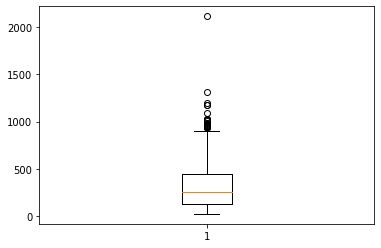

In [20]:
#melihat visualisasi dari outlier dengan menggunakan boxplot
plt.boxplot(ecom['price'])
plt.show()

### 5.  Analisa Data 

In [27]:
top_category = ecom.groupby(['category']).mean()['perc_of_unit_sold'].sort_values(ascending=False)
top_category

category
Perfumes & Fragrances    73.793651
Athletic Shoes           63.048780
Watches                  61.865772
Casual & Dress Shoes     52.028571
Sportswear               51.142857
Eyewear                  48.307692
Wallets                  43.942857
Name: perc_of_unit_sold, dtype: float64

In [44]:
top_category_male = ecom[ecom['gender']=='men']
top_male= top_category_male.groupby(['category']).mean()['perc_of_unit_sold'].sort_values(ascending=False)

In [45]:
top_category_women = ecom[ecom['gender']=='women']
top_women = top_category_women.groupby(['category']).mean()['perc_of_unit_sold'].sort_values(ascending=False)

In [69]:
#10 produk yang paling kurang laku
less_product = ecom[ecom['perc_of_unit_sold']<50].sort_values(by = 'perc_of_unit_sold', ascending=True)
less =less_product.head(10).sort_values(by = 'perc_of_unit_sold', ascending=True)
less


,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
212,70,Eyewear,"Ray-Ban Sunglasses Unisex , Lense Size 54 mm ,...",997.0,503.49,2.0,NaN,FREE Shipping,Unisex
565,136,Watches,Casio Women'S Digital Dial Stainless Steel Ban...,78.0,69.00,2.0,88.0,NaN,women
157,15,Eyewear,Ray-Ban Aviator Unisex Sunglasses - RB3025-004...,900.0,517.15,2.0,80.0,FREE Shipping,Unisex
247,105,Eyewear,Ray-Ban Aviator Unisex Sunglasses - Rb3025-019...,855.0,473.98,3.0,90.0,FREE Shipping,Unisex
393,1,Wallets,"Tommy Hilfiger Bifold Wallet For Women,Leather...",469.0,172.48,3.0,NaN,Eligible for FREE Shipping,women
451,22,Watches,Hugo Boss Casual Round Watch for Men,1285.0,407.99,3.0,NaN,FREE Shipping,men
403,11,Wallets,"Calvin Klein Bifold Wallet for Men , Black",160.0,95.00,4.0,NaN,Eligible for FREE Shipping,men
392,0,Wallets,"Tommy Hilfiger Bifold WAllet For Women,LeAther...",469.0,172.48,5.0,NaN,Eligible for FREE Shipping,women
481,52,Watches,Hugo Boss Casual Round Watch for Men,1285.0,412.48,9.0,NaN,FREE Shipping,men
379,20,Sportswear,adidas Color Block High Rise 3/4 Logo Print ...,189.0,130.48,10.0,NaN,Eligible for FREE Shipping,women


In [38]:
#10 produk yang paling laku
top_product = ecom.sort_values(by = 'perc_of_unit_sold', ascending=False)
top_product.head(10)

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
321,25,Perfumes & Fragrances,Mancera Roses Vanille for Unisex - Eau de Parf...,415.0,197.98,99.0,92.0,Eligible for FREE Shipping,Unisex
165,23,Eyewear,Ray-Ban Aviator Sunglasses For Men - Rb3449-00...,770.0,464.49,99.0,86.0,FREE Shipping,men
441,12,Watches,Casio LTP-1275G-9A For Women Analog-Dress Wat...,162.0,122.99,98.0,88.0,NaN,women
598,169,Watches,Hugo Boss Men's Black Dial Silicone Band Watch...,685.0,435.98,98.0,96.0,FREE Shipping,men
334,38,Perfumes & Fragrances,"Burberry London for Women - Eau de Parfum, 100ml",252.0,127.97,98.0,90.0,Eligible for FREE Shipping,women
540,111,Watches,Casio Men's Ana-Digi Dial Stainless Steel Band...,336.0,149.00,98.0,80.0,NaN,men
336,40,Perfumes & Fragrances,Calvin Klein Euphoria Intense for Men - Eau de...,282.0,84.09,98.0,84.0,Eligible for FREE Shipping,men
495,66,Watches,JBW Jet Setter Men's 234 Diamonds Gold Dial Go...,29970.0,2115.49,98.0,72.0,FREE Shipping,men
190,48,Eyewear,"Ray-Ban Sunglasses For Men - Grey, 3553I, 59, ...",525.0,282.99,98.0,86.0,FREE Shipping,men
305,9,Perfumes & Fragrances,"Calvin Klein Beauty for Women - Eau de Parfum,...",357.0,84.98,97.0,86.0,Eligible for FREE Shipping,women


### 6. Visualisasi Data (Univariate dan Multivariate, Gunakan plot sesuai dengan fungsi dan tujuannya)

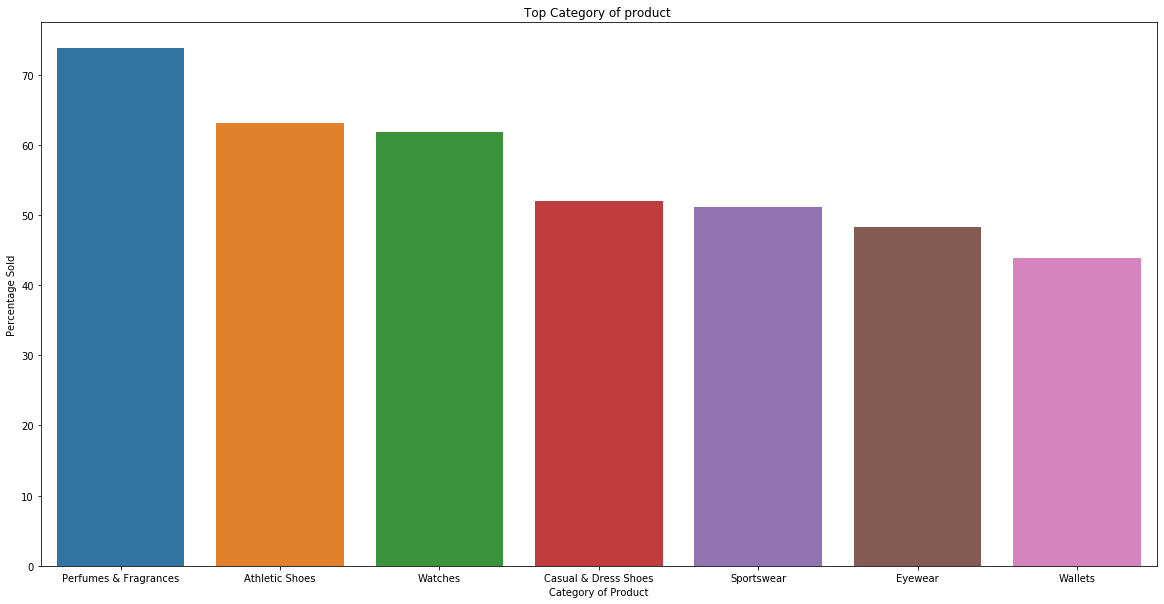

In [41]:
fig = plt.subplots(figsize=(20,10)) #code untuk memberikan ukuran grafik


axes = sns.barplot(data = ecom, x=top_category.index, y = top_category) #code untuk menampilkan barplot
axes.set_xlabel('Category of Product') #memberi nama label pada xlabel
axes.set_ylabel('Percentage Sold') #memberi label pada y label
axes.set_title('Top Category of product ') #memberi nama title dari grafic
plt.show() # untuk menghilangkan format tulisan ketika menampilkan grafik

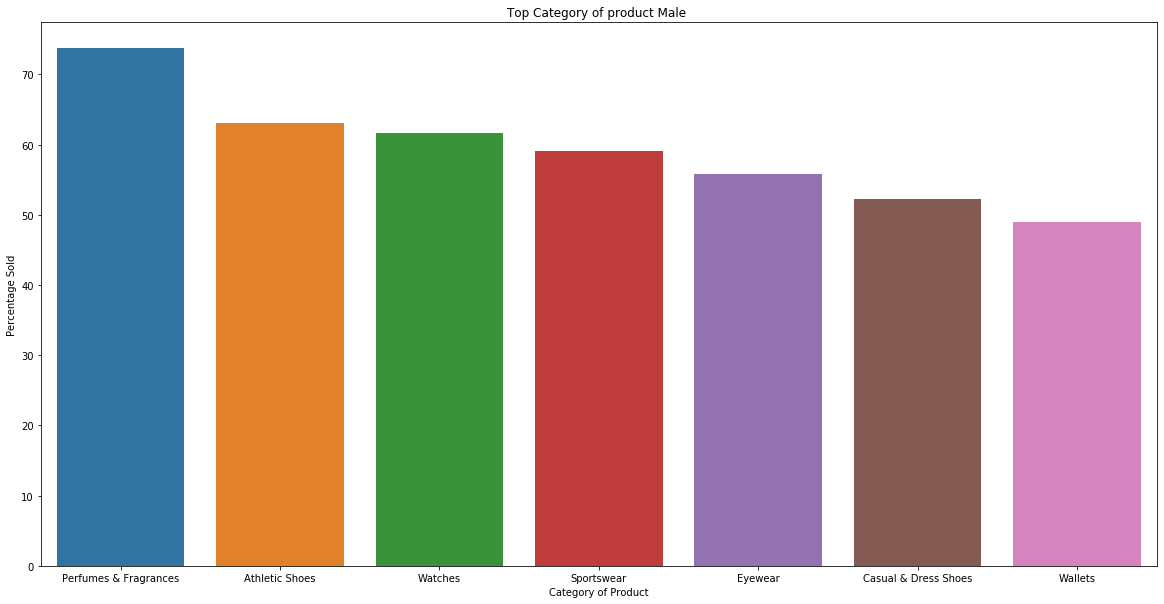

In [48]:
fig = plt.subplots(figsize=(20,10)) #code untuk memberikan ukuran grafik


axes = sns.barplot(data = ecom, x=top_male.index, y = top_male) #code untuk menampilkan barplot
axes.set_xlabel('Category of Product') #memberi nama label pada xlabel
axes.set_ylabel('Percentage Sold') #memberi label pada y label
axes.set_title('Top Category of product Male ') #memberi nama title dari grafic
plt.show() # untuk menghilangkan format tulisan ketika menampilkan grafik

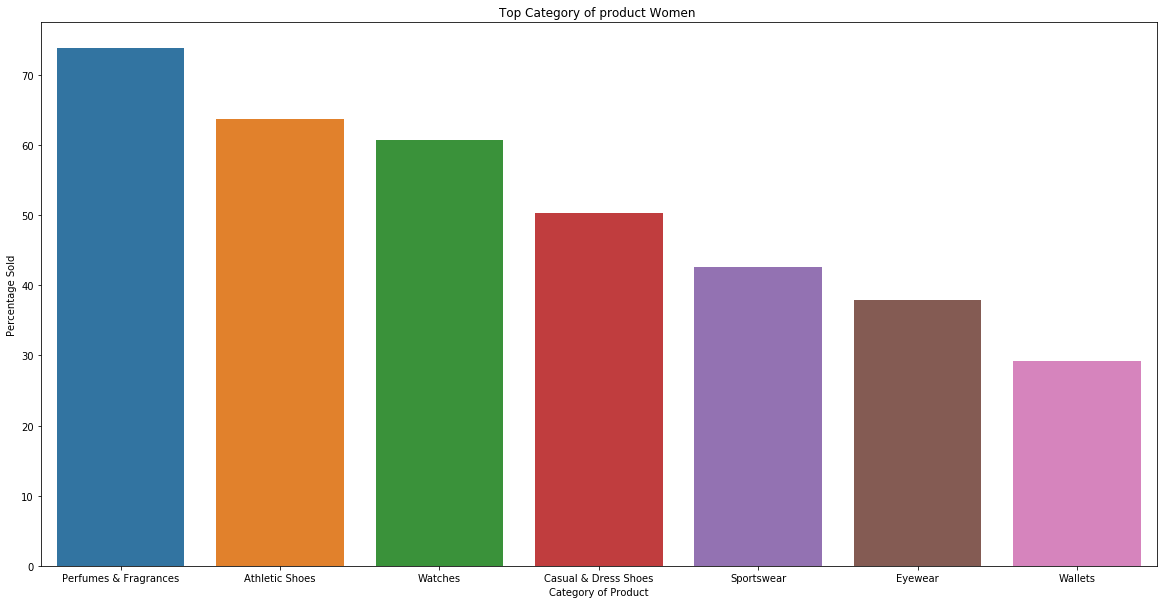

In [49]:
fig = plt.subplots(figsize=(20,10)) #code untuk memberikan ukuran grafik


axes = sns.barplot(data = ecom, x=top_women.index, y = top_women) #code untuk menampilkan barplot
axes.set_xlabel('Category of Product') #memberi nama label pada xlabel
axes.set_ylabel('Percentage Sold') #memberi label pada y label
axes.set_title('Top Category of product Women ') #memberi nama title dari grafic
plt.show() # untuk menghilangkan format tulisan ketika menampilkan grafik

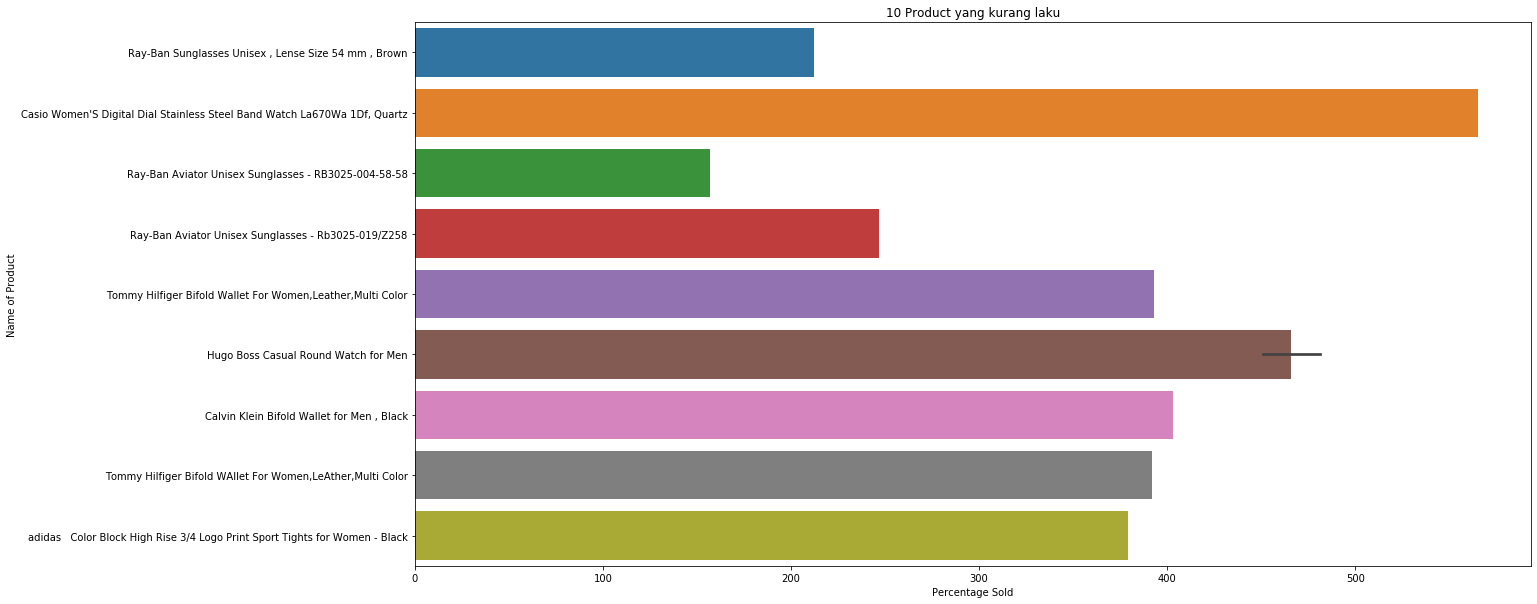

In [73]:
fig = plt.subplots(figsize=(20,10)) #code untuk memberikan ukuran grafik


axes = sns.barplot(data = ecom, x=less.head(10).index, y = less['product'].head(10).values) #code untuk menampilkan barplot
axes.set_ylabel('Name of Product') #memberi nama label pada xlabel
axes.set_xlabel('Percentage Sold') #memberi label pada y label
axes.set_title('10 Product yang kurang laku') #memberi nama title dari grafic
plt.show() # untuk menghilangkan format tulisan ketika menampilkan grafik

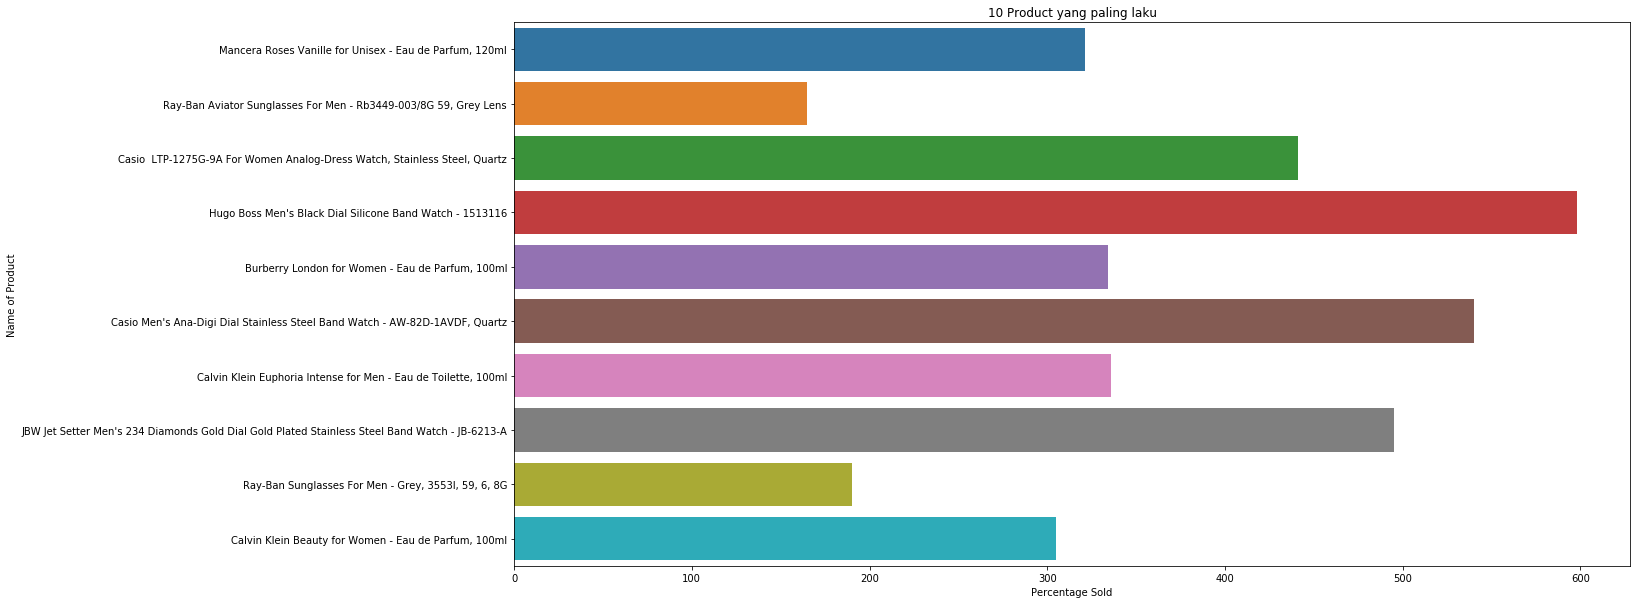

In [75]:
fig = plt.subplots(figsize=(20,10)) #code untuk memberikan ukuran grafik


axes = sns.barplot(data = ecom, x=top_product.head(10).index, y = top_product['product'].head(10)) #code untuk menampilkan barplot
axes.set_ylabel('Name of Product') #memberi nama label pada xlabel
axes.set_xlabel('Percentage Sold') #memberi label pada y label
axes.set_title('10 Product yang paling laku') #memberi nama title dari grafic
plt.show() # untuk menghilangkan format tulisan ketika menampilkan grafi

Dari Hasil Analisa kita mendapatkan insight yaitu :
- product yang paling laris dari perempuan maupun pria adalah parfume, sedangkan produk yang paling tidak laku dari pria maupun perempuan adalah dompet. sehingga dari analisa tersebut dapat disimpulkan bahwa untuk categori dompet perlu di batasi  produksinya agar tidak terjadi penumpukan stock
- untuk 10 produk yang paling tidak laku, diperlukan promo bundle dengan penjualan 10 produk terlaris, selain itu juga diberikan promo gratis ongkos kirim


- Diharapkan dengan saran yang diberikan , profit dari penjualan produk e-commerce tersebut meningkat